In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('real_estate.csv')

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# For simplicity, let's drop rows with missing values
data = data.dropna()

# Convert categorical variables to dummy variables (if any)
data = pd.get_dummies(data, drop_first=True)

# Normalize/Standardize the data if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame
data = pd.DataFrame(data_scaled, columns=data.columns)


    House_Size  Num_Bedrooms  Num_Bathrooms    Location        Price
0  1649.014246             4              3  Location_B  363594.6268
1  1458.520710             1              3  Location_A  315387.3243
2  1694.306561             3              1  Location_B  341449.9540
3  1956.908957             5              3  Location_B  417367.0800
4  1429.753988             3              3  Location_C  305858.3625
House_Size       0
Num_Bedrooms     0
Num_Bathrooms    0
Location         0
Price            0
dtype: int64


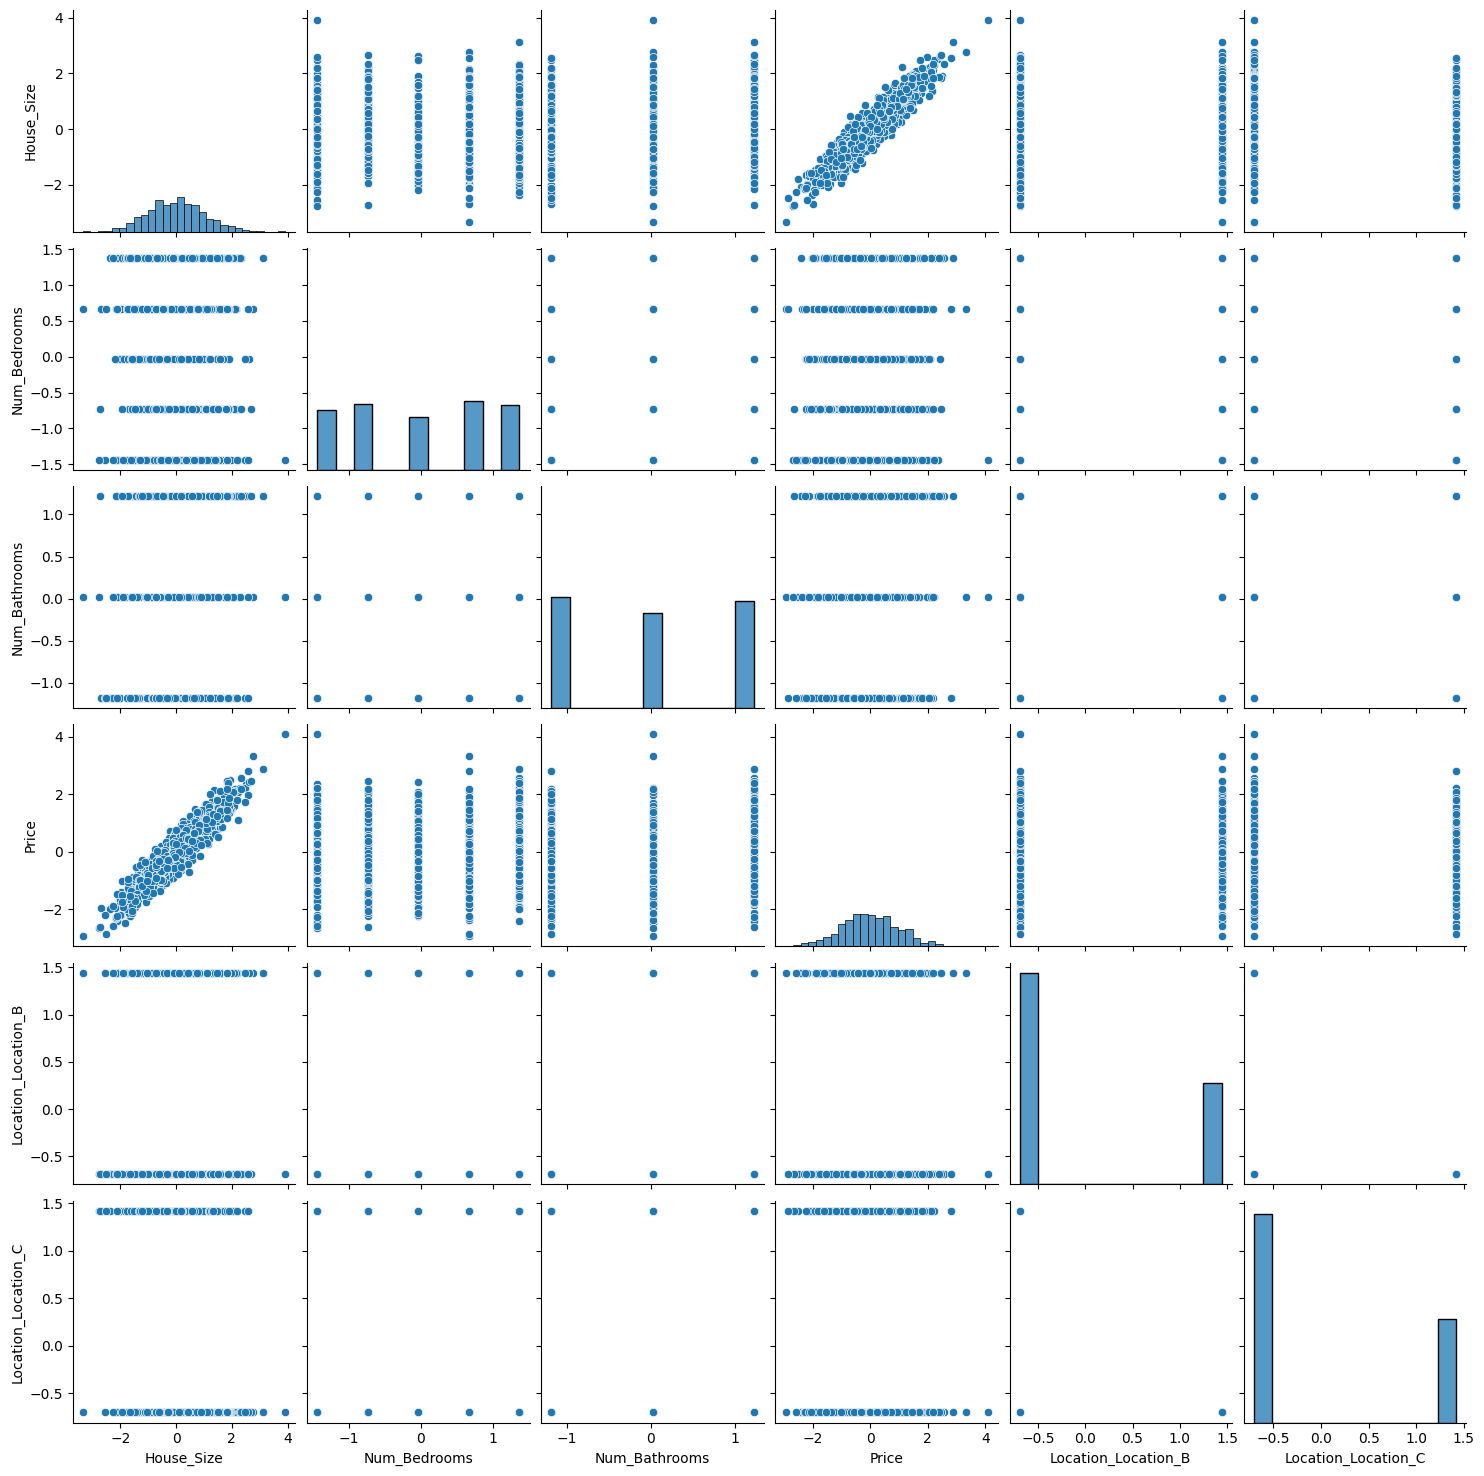

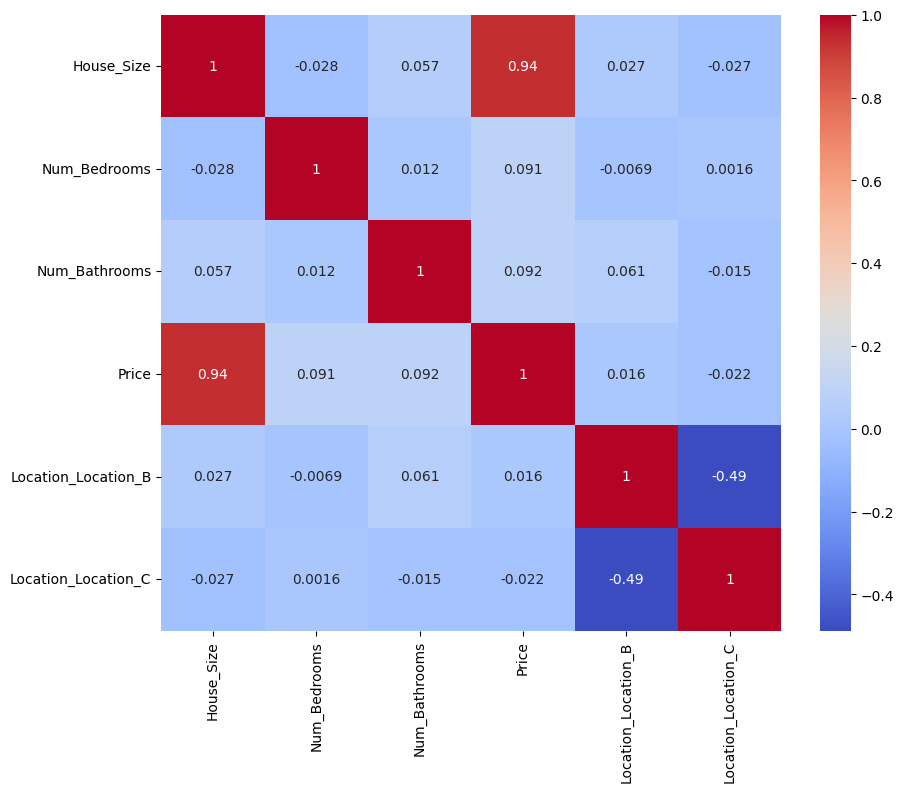

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to see the relationship between features
sns.pairplot(data)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' is the target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.11532033293335461
R^2 Score: 0.8829089600269246


In [4]:
new_data = pd.DataFrame({
    'House_Size': [1600],
    'Num_Bedrooms': [3],
    'Num_Bathrooms': [2],
    'Location_A': [0],  # Dummy variable for Location_A
    'Location_B': [1],  # Dummy variable for Location_B
    'Location_C': [0]   # Dummy variable for Location_C
})

# Ensure the new data has the same columns as the training data
new_data = new_data[X.columns]

# Preprocess the new data similarly
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = model.predict(new_data_scaled)
print(f'Predicted Price: {prediction}')

NameError: name 'pd' is not defined